In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Transformed Image')

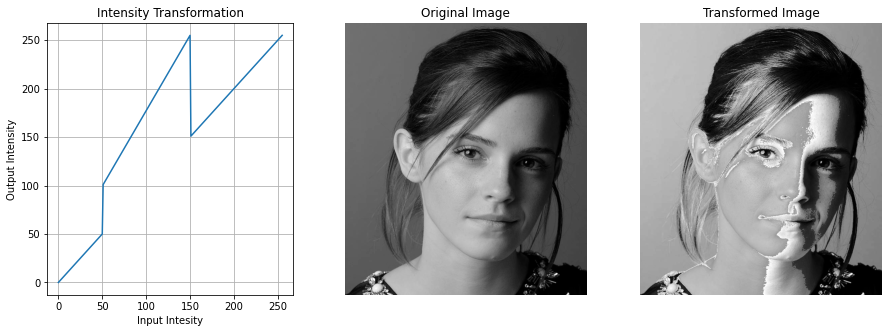

In [2]:
emma_img_gray = cv.imread(r"Images\emma_gray.jpg", cv.IMREAD_GRAYSCALE)

section_1 = np.linspace(0, 50, 51)
section_2 = np.linspace(101, 255, 100)
section_3 = np.linspace(151, 255, 105)

intensity_transform = np.concatenate((section_1, section_2, section_3), axis=0)

emma_img_gray_transformed = cv.LUT(emma_img_gray, intensity_transform)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(intensity_transform)
ax[0].set_xlabel("Input Intesity")
ax[0].set_ylabel("Output Intensity")
ax[0].set_title("Intensity Transformation")
ax[0].grid()

ax[1].imshow(emma_img_gray, cmap = "gray")
ax[1].axis("off")
ax[1].set_title("Original Image")

ax[2].imshow(emma_img_gray_transformed, cmap = "gray")
ax[2].axis('off')
ax[2].set_title("Transformed Image")


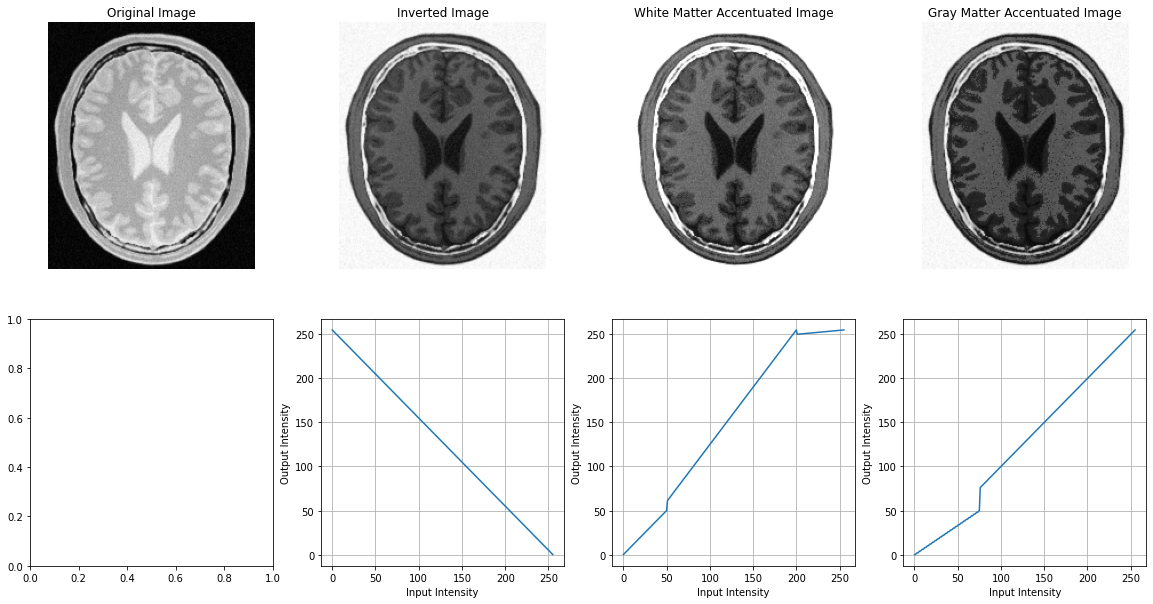

In [3]:
brain_img = cv.imread(r"Images\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

#inversion
invert = np.array([i for i in range(255, -1, -1)]).astype(np.uint8)

#white matter
segment_1 = np.array([i for i in range(0, 51)])
segment_2 = np.array([1.3*i - 5 for i in range(51, 201)])
segment_3 = np.array([i/11 + 231.81 for i in range(201, 256)])
white_matter_transform = np.concatenate((segment_1, segment_2, segment_3), axis=0)

#gray matter transform
segment_1_gray = np.array([2*i/3 for i in range(0, 76)]).astype(np.uint8)
segment_2_gray = np.array([i for i in range(76, 256)]).astype(np.uint8) #1.323*i - 82.25
gray_matter_transform = np.concatenate((segment_1_gray, segment_2_gray), axis=0)

# Intensity transformation
brain_img_invert = cv.LUT(brain_img, invert)
brain_img_white_matter = cv.LUT(brain_img_invert, white_matter_transform)
brain_img_gray_matter = cv.LUT(brain_img_invert, gray_matter_transform)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0][0].imshow(brain_img, cmap = "gray", vmax = 255, vmin = 0)
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].imshow(brain_img_invert, cmap = "gray", vmax = 255, vmin = 0)
ax[0][1].set_title("Inverted Image")
ax[0][1].axis('off')

ax[0][2].imshow(brain_img_white_matter, cmap = "gray")
ax[0][2].set_title("White Matter Accentuated Image")
ax[0][2].axis('off')

ax[0][3].imshow(brain_img_gray_matter, cmap = "gray")
ax[0][3].set_title("Gray Matter Accentuated Image")
ax[0][3].axis('off')

#Transform plots
ax[1][1].plot(invert)
ax[1][1].set_xlabel("Input Intensity")
ax[1][1].set_ylabel("Output Intensity")
ax[1][1].grid()

ax[1][2].plot(white_matter_transform)
ax[1][2].set_xlabel("Input Intensity")
ax[1][2].set_ylabel("Output Intensity")
ax[1][2].grid()

ax[1][3].plot(gray_matter_transform)
ax[1][3].set_xlabel("Input Intensity")
ax[1][3].set_ylabel("Output Intensity")
ax[1][3].grid()

Text(0.5, 1.0, 'Distribution of the lightness value (L value)')

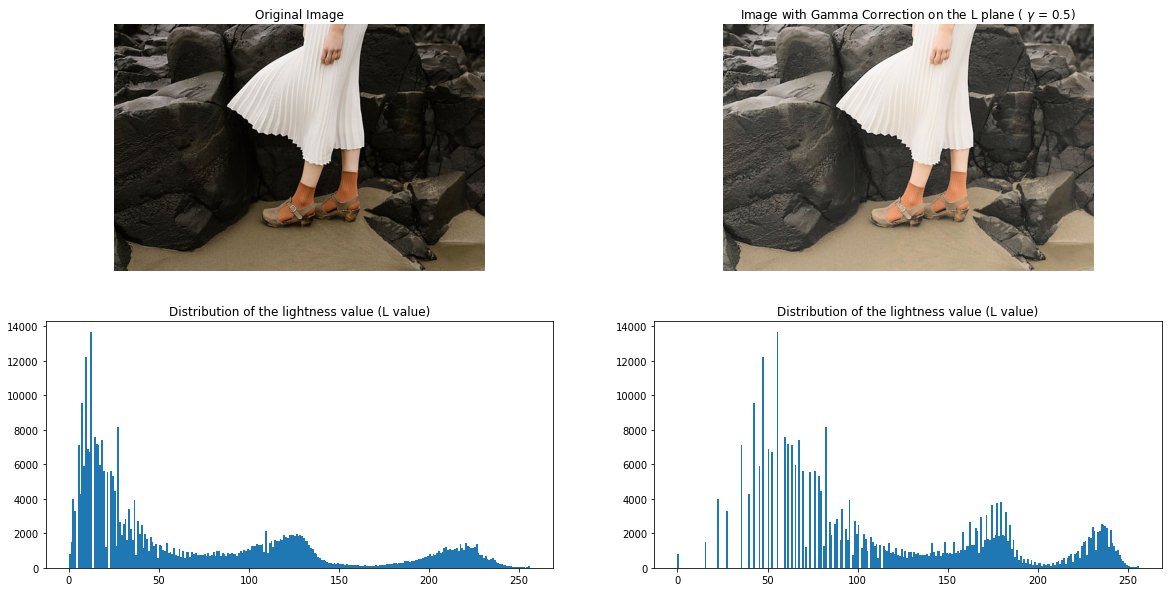

In [4]:
lady_img = cv.imread(r"Images\highlights_and_shadows.jpg")

lady_img_orig_lab = cv.cvtColor(lady_img, cv.COLOR_BGR2LAB)
lady_img_lab = cv.cvtColor(lady_img, cv.COLOR_BGR2LAB)

gamma = 0.5
gamma_transform = np.array([(i/255.0)**gamma * 255.0 for i in range(0, 256)]).astype(np.uint8)

lady_img_lab[:,:,0] = cv.LUT(lady_img_lab[:,:,0], gamma_transform)

lady_img_orig_rgb = cv.cvtColor(lady_img, cv.COLOR_BGR2RGB)
lady_img_lab_rgb = cv.cvtColor(lady_img_lab, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].imshow(lady_img_orig_rgb)
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].imshow(lady_img_lab_rgb)
ax[0][1].set_title("Image with Gamma Correction on the L plane ( $\gamma$ = 0.5)")
ax[0][1].axis('off')

ax[1][0].hist(lady_img_orig_lab[:,:,0].flatten(), 256, [0, 256])
ax[1][0].set_title("Distribution of the lightness value (L value)")

ax[1][1].hist(lady_img_lab[:,:,0].flatten(), 256, [0, 256])
ax[1][1].set_title("Distribution of the lightness value (L value)")

In [5]:
def histogram_equalization(gray_img, max_val = 255):
    gray_img_flat = gray_img.flatten()
    element_count = np.array([np.count_nonzero(gray_img_flat == i) for i in range(0, 256)])
    coefficient = max_val / gray_img_flat.shape[0]

    sums = np.array([np.sum(element_count[0:i]) for i in range(1, 257)])

    hist_equalization_transform = ( coefficient * sums ).astype(np.uint8)

    gray_img_transformed = cv.LUT(gray_img, hist_equalization_transform)

    fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    ax.plot(hist_equalization_transform)
    ax.set_title("Histogram Equalization Transform")
    ax.set_xlabel("Input Intensity")
    ax.set_ylabel("Output Intensity")
    ax.grid()

    return gray_img_transformed

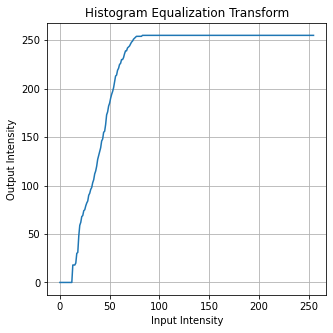

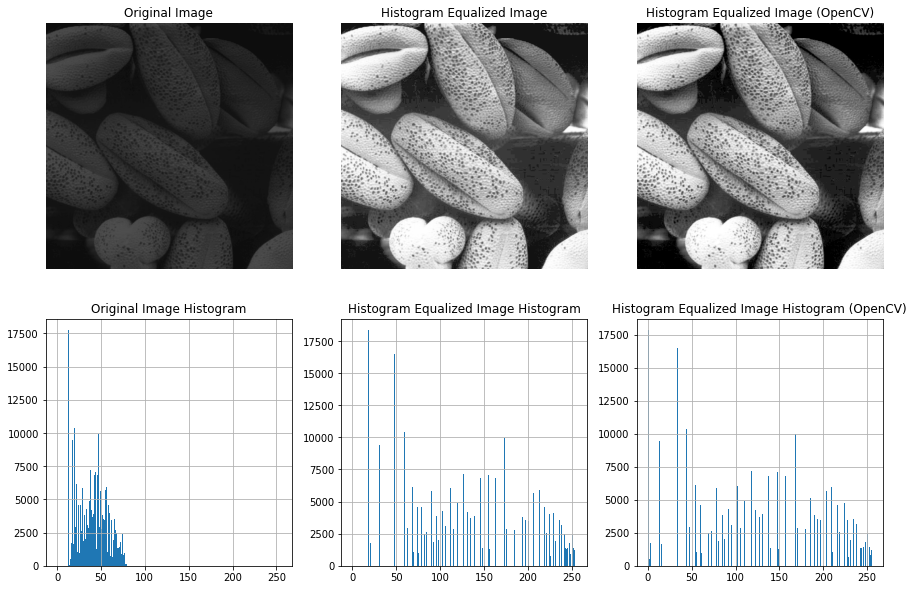

In [6]:
shells_gray_img = cv.imread(r"Images\shells.png", cv.IMREAD_GRAYSCALE)

shells_gray_img_transformed = histogram_equalization(shells_gray_img)
equ_shells_gray_img = cv.equalizeHist(shells_gray_img)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0][0].imshow(shells_gray_img, cmap = "gray", vmax = 255, vmin = 0)
ax[0][0].set_title("Original Image")
ax[0][0].axis("off")

ax[0][1].imshow(shells_gray_img_transformed, cmap = "gray", vmax = 255, vmin = 0)
ax[0][1].set_title("Histogram Equalized Image")
ax[0][1].axis("off")

ax[0][2].imshow(equ_shells_gray_img, cmap = "gray", vmax = 255, vmin = 0)
ax[0][2].set_title("Histogram Equalized Image (OpenCV)")
ax[0][2].axis("off")

ax[1][0].hist(shells_gray_img.flatten(), 256, [0, 255])
ax[1][0].set_title("Original Image Histogram")
ax[1][0].grid()

ax[1][1].hist(shells_gray_img_transformed.flatten(), 256, [0, 255])
ax[1][1].set_title("Histogram Equalized Image Histogram")
ax[1][1].grid()

ax[1][2].hist(equ_shells_gray_img.flatten(), 256, [0, 255])
ax[1][2].set_title("Histogram Equalized Image Histogram (OpenCV)")
ax[1][2].grid()

In [7]:
#5
def nearest_neighbour_zoom(img, scale):
    num_rows = round(img.shape[0] * scale)
    num_columns = round(img.shape[1] * scale)

    scale = num_rows / img.shape[0]

    zoomed_img = np.zeros((num_rows, num_columns, img.shape[2]), np.uint8)

    for z in range(0, img.shape[2]):
        for i in range(0, num_rows):
            for j in range(0, num_columns):
                zoomed_img[i, j, z] = img[ min(round(i/scale), img.shape[0]-1), min(round(j/scale), img.shape[1]-1), z]

    cv.namedWindow("Original", cv.WINDOW_AUTOSIZE)
    cv.imshow("Original", img)
    cv.waitKey(0)

    cv.namedWindow("Zoomed Image", cv.WINDOW_AUTOSIZE)
    cv.imshow("Zoomed Image", zoomed_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return zoomed_img

def bilinear_interpolation(img, scale):
    num_rows = round(img.shape[0] * scale)
    num_columns = round(img.shape[1] * scale)

    scale = num_rows / img.shape[0]

    zoomed_img = np.zeros((num_rows, num_columns, img.shape[2]), np.uint8)

    neighbours = [ [], [], [], [] ]

    for z in range(0, img.shape[2]):
        for i in range(0, num_rows):
            for j in range(0, num_columns):
                neighbours[0] = [int(i/scale), int(j/scale)]
                neighbours[1] = [min(int(i/scale)+1, img.shape[0]-1), int(j/scale)]
                neighbours[2] = [int(i/scale), min(int(j/scale)+1, img.shape[1]-1)]
                neighbours[3] = [min(int(i/scale)+1, img.shape[0]-1), min(int(j/scale)+1, img.shape[1]-1)]

                viable_neighbours = []

                for k in range(4):
                    if (neighbours.count(neighbours[k]) == 1):
                        viable_neighbours.append(neighbours[k])
                
                if ( len(viable_neighbours) == 1 ):
                    intensity = img[viable_neighbours[0], viable_neighbours[1], z]
                elif ( len(viable_neighbours) == 2 ):
                    if ( viable_neighbours[0][0] != viable_neighbours[1][0] ):
                        intensity = img[ viable_neighbours[0][0], viable_neighbours[0][1], z ] * abs(i/scale - viable_neighbours[0][0]) + img[ viable_neighbours[1][0], viable_neighbours[1][1], z ] * abs(i/scale - viable_neighbours[1][0]) 
                    else:
                        intensity = img[ viable_neighbours[0][0], viable_neighbours[0][1], z ] * abs(j/scale - viable_neighbours[0][1]) + img[ viable_neighbours[1][0], viable_neighbours[1][1], z ] * abs(j/scale - viable_neighbours[1][1])
                elif ( len(viable_neighbours) == 4 ):
                    intensity_1 = img[ viable_neighbours[0][0], viable_neighbours[0][1], z ] * abs(i/scale - viable_neighbours[0][0]) + img[ viable_neighbours[1][0], viable_neighbours[1][1], z ] * abs(i/scale - viable_neighbours[1][0])
                    intensity_2 = img[ viable_neighbours[2][0], viable_neighbours[2][1], z ] * abs(i/scale - viable_neighbours[2][0]) + img[ viable_neighbours[3][0], viable_neighbours[3][1], z ] * abs(i/scale - viable_neighbours[3][0])

                    intensity = intensity_1 * abs(j/scale - viable_neighbours[0][1]) + intensity_2 * abs(j/scale - viable_neighbours[2][1])
                
                zoomed_img[i, j, z] = intensity


    cv.namedWindow("Original", cv.WINDOW_AUTOSIZE)
    cv.imshow("Original", img)
    cv.waitKey(0)

    cv.namedWindow("Zoomed Image", cv.WINDOW_AUTOSIZE)
    cv.imshow("Zoomed Image", zoomed_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    return zoomed_img

In [155]:
# teseting the two functions
test_img = cv.imread(r"Images\a1q5images\im01small.png", cv.IMREAD_COLOR)

zoomed_img_1 = nearest_neighbour_zoom(test_img, 3)
zoomed_img_2 = bilinear_interpolation(test_img, 3)

In [10]:
#displaying the scaled images taken from the previous block
cv.namedWindow("Zoomed Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Zoomed Image", zoomed_img_1)
cv.waitKey(0)
cv.imshow("Zoomed Image", zoomed_img_2)
cv.waitKey(0)
cv.destroyAllWindows()

(-0.5, 363.5, 379.5, -0.5)

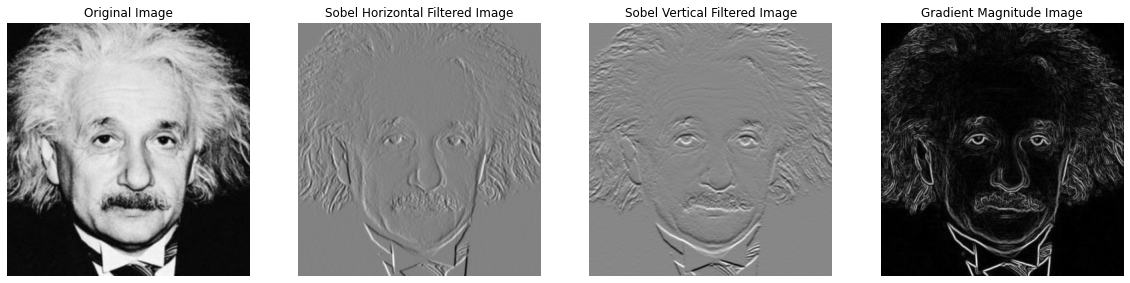

In [169]:
#6 a)
einstein_img = cv.imread(r"Images\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_horizontal = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] ).astype(np.float32)
sobel_vertical = np.array( [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ] ).astype(np.float32)

einstein_img_vertical_grads = cv.filter2D(einstein_img, -1, sobel_horizontal)
einstein_img_horizontal_grads = cv.filter2D(einstein_img, -1, sobel_vertical)
einstein_img_grads_magnitude = ( einstein_img_vertical_grads ** 2 + einstein_img_horizontal_grads ** 2 ) ** 0.5

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(einstein_img, cmap = "gray")
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(einstein_img_vertical_grads, cmap = "gray")
ax[1].set_title("Sobel Horizontal Filtered Image")
ax[1].axis('off')

ax[2].imshow(einstein_img_horizontal_grads, cmap = "gray")
ax[2].set_title("Sobel Vertical Filtered Image")
ax[2].axis('off')

ax[3].imshow(einstein_img_grads_magnitude, cmap = "gray")
ax[3].set_title("Gradient Magnitude Image")
ax[3].axis('off')

In [171]:
#6 b)
def filter_image(img, filter):
    upper_padding = int( (filter.shape[0] - 1) / 2 )
    lower_padding = filter.shape[0] - 1 - upper_padding
    left_padding = int( (filter.shape[1] - 1) / 2 )
    right_padding = filter.shape[1] - 1 - left_padding

    img_shape_rows = img.shape[0]
    img_shape_columns = img.shape[1]

    img = np.append(img, np.zeros((img_shape_rows, left_padding)), axis=1 )
    img = np.append(np.zeros((img_shape_rows, right_padding)), img, axis=1 )
    img = np.append(img, np.zeros((upper_padding, img_shape_columns+left_padding+right_padding)), axis=0)
    img = np.append(np.zeros((lower_padding, img_shape_columns+left_padding+right_padding)), img, axis=0)

    start_index_column = left_padding
    end_index_column = img.shape[1] - 1 - right_padding
    start_index_row = upper_padding
    end_index_row = img.shape[0] - 1 - lower_padding

    filtered_img = np.zeros((img.shape[0], img.shape[1]))

    for i in range(start_index_row, end_index_row+1):
        for j in range(start_index_column, end_index_column+1):
            for filter_i in range(filter.shape[0]):
                for filter_j in range(filter.shape[1]):
                    filtered_img[i, j] += filter[filter_i, filter_j] * img[i+(filter_i-upper_padding), j+(filter_j-left_padding)]

    return filtered_img
    
    

(-0.5, 363.5, 379.5, -0.5)

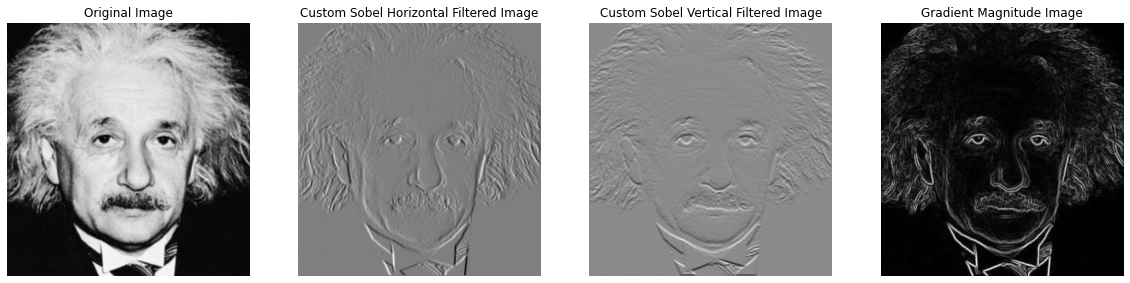

In [173]:
custom_einstein_horizontal_grads = filter_image(einstein_img, sobel_vertical)
custom_einstein_vertical_grads = filter_image(einstein_img, sobel_horizontal)
custom_einstein_grads_magnitude = ( custom_einstein_vertical_grads**2 + custom_einstein_horizontal_grads**2 )**0.5

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(einstein_img, cmap = "gray")
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(custom_einstein_vertical_grads, cmap = "gray")
ax[1].set_title("Custom Sobel Horizontal Filtered Image")
ax[1].axis('off')

ax[2].imshow(custom_einstein_horizontal_grads, cmap = "gray")
ax[2].set_title("Custom Sobel Vertical Filtered Image")
ax[2].axis('off')

ax[3].imshow(einstein_img_grads_magnitude, cmap = "gray")
ax[3].set_title("Gradient Magnitude Image")
ax[3].axis('off')

(-0.5, 365.5, 381.5, -0.5)

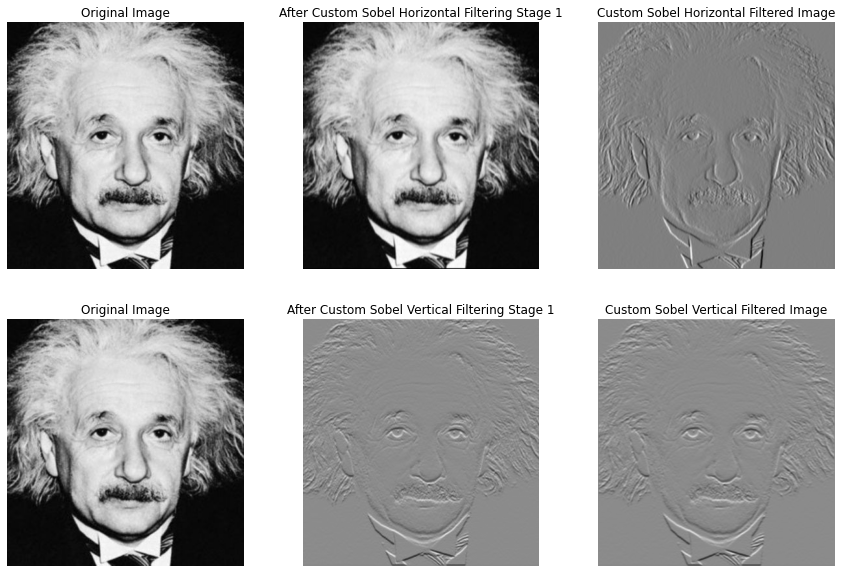

In [174]:
#6 c)
sobel_horizontal_filter_stage_1 = np.array( [ [1], [2], [1] ] )
sobel_horizontal_filter_stage_2 = np.array( [ [-1, 0, 1] ] )

sobel_vertical_filter_stage_1 = np.array( [ [-1], [0], [1] ] )
sobel_vertical_filter_stage_2 = np.array( [ [1, 2, 1] ] )

custom_einstein_vertical_grads_stage_1 = filter_image(einstein_img, sobel_horizontal_filter_stage_1)
custom_einstein_vertical_grads = filter_image(custom_einstein_vertical_grads_stage_1, sobel_horizontal_filter_stage_2)

custom_einstein_horizontal_grads_stage_1 = filter_image(einstein_img, sobel_vertical_filter_stage_1)
custom_einstein_horizontal_grads = filter_image(custom_einstein_horizontal_grads_stage_1, sobel_vertical_filter_stage_2)

fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0][0].imshow(einstein_img, cmap = "gray")
ax[0][0].set_title("Original Image")
ax[0][0].axis('off')

ax[0][1].imshow(custom_einstein_vertical_grads_stage_1, cmap = "gray")
ax[0][1].set_title("After Custom Sobel Horizontal Filtering Stage 1")
ax[0][1].axis('off')

ax[0][2].imshow(custom_einstein_vertical_grads, cmap = "gray")
ax[0][2].set_title("Custom Sobel Horizontal Filtered Image")
ax[0][2].axis('off')

ax[1][0].imshow(einstein_img, cmap = "gray")
ax[1][0].set_title("Original Image")
ax[1][0].axis('off')

ax[1][1].imshow(custom_einstein_horizontal_grads_stage_1, cmap = "gray")
ax[1][1].set_title("After Custom Sobel Vertical Filtering Stage 1")
ax[1][1].axis('off')

ax[1][2].imshow(custom_einstein_horizontal_grads, cmap = "gray")
ax[1][2].set_title("Custom Sobel Vertical Filtered Image")
ax[1][2].axis('off')

(-0.5, 560.5, 840.5, -0.5)

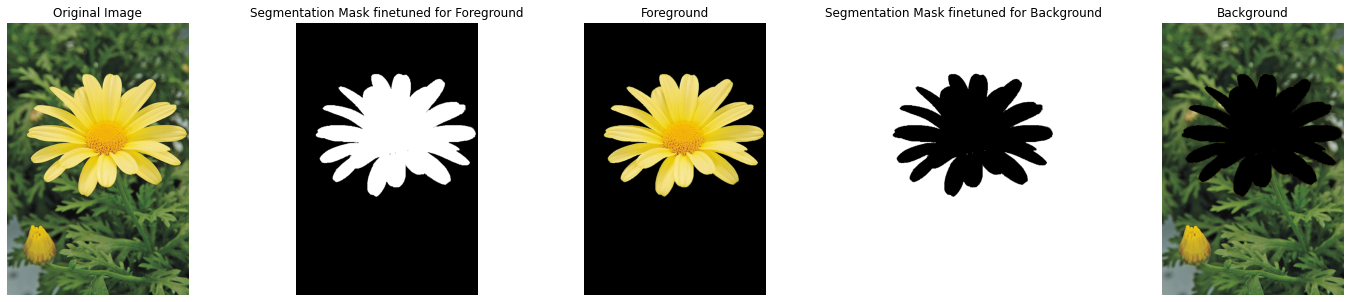

In [128]:
#7 a)
daisy_img = cv.imread(r"Images\daisy.jpg", cv.IMREAD_COLOR)

mask = np.zeros(daisy_img.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (50, 50, 600, 550)
cv.grabCut(daisy_img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask_foreground = np.where((mask == 1) | (mask == 3), 1, 0)
mask_background = np.where((mask == 0) | (mask == 2), 1, 0)

forground_daisy_img = np.multiply(daisy_img, mask_foreground[:,:,np.newaxis])
background_daisy_img = np.multiply(daisy_img, mask_background[:,:,np.newaxis])

daisy_img_rgb = cv.cvtColor(daisy_img, cv.COLOR_BGR2RGB)
forground_daisy_img_rgb = cv.cvtColor(np.uint8(forground_daisy_img), cv.COLOR_BGR2RGB)
background_daisy_img_rgb = cv.cvtColor(np.uint8(background_daisy_img), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(daisy_img_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask_foreground, cmap = "gray", vmax = 1, vmin = 0)
ax[1].set_title("Segmentation Mask finetuned for Foreground")
ax[1].axis("off")

ax[2].imshow(forground_daisy_img_rgb)
ax[2].set_title("Foreground")
ax[2].axis("off")

ax[3].imshow(mask_background, cmap = "gray", vmax = 1, vmin = 0)
ax[3].set_title("Segmentation Mask finetuned for Background")
ax[3].axis("off")

ax[4].imshow(background_daisy_img_rgb)
ax[4].set_title("Background")
ax[4].axis("off")

(-0.5, 560.5, 840.5, -0.5)

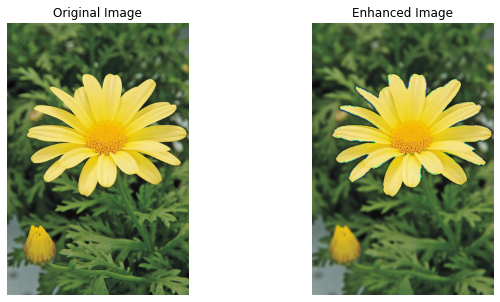

In [152]:
#7) b)
#background_daisy_img_blurred = cv.medianBlur(np.uint8(background_daisy_img), 5)
background_daisy_img_blurred = cv.GaussianBlur(np.uint8(background_daisy_img), (9,9), 10)

enchanced_img = forground_daisy_img +  background_daisy_img_blurred
enchanced_img_rgb = cv.cvtColor(np.uint8(enchanced_img), cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(daisy_img_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(enchanced_img_rgb)
ax[1].set_title("Enhanced Image")
ax[1].axis("off")